*** Kelompok 5***
1. Agung Wahyu Prayogo - Universitas Bhayangkara - Informatika
2. Fanny Febryani - Universitas Pendidikan Indonesia - Matematika
3. Diah Siti Fatimah Azzahrah - Universitas Negeri Semarang - Teknik Informatika 




### **Regresi Linear (Supervised Learning)**
Regresi linear adalah analisis untuk mempelajari atau mengukur hubungan antar dua variabel atau lebih. Biasanya digunakan untuk menghitung prediksi seperti harga rumah, gaji, dll
- Untuk menjelaskan apa pengaruh dari perubahan pada sebuah independent variable terhadap dependent variable melalui estimasi nilai numerik dari hubungan yang ada
*Notes: Dependent variabel (variabel terikat) adalah Y dan Independent variabel (Variabel bebas) adalah X


In [ ]:
from __future__ import print_function
from __future__ import division

#Baris from __future__ import print_function mengaktifkan 
#pencetakan Python 3 di Python 2.6 dan yang lebih baru.

Import Library

In [ ]:
# Necessary Imports
import pandas as pd                   #proses analisis data seperti manipulasi data, persiapan data, dan pembersihan data.
import numpy as np                    #scientific computing.
import matplotlib.pyplot as plt       #visualisasi data seperti membuat plot grafik.
import seaborn as sns                 #untuk visualisasi data yang dibangun di atas matplotlib.
import warnings             
warnings.filterwarnings('ignore')
%matplotlib inline


In [ ]:
from sklearn.linear_model import LinearRegression  # Module LinearRegression digunakan untuk memanggil algoritma Linear Regression.

Mengimport file dataset 

In [ ]:
# Import file dataset
data = pd.read_csv('kc_house_data.csv')
# Menampilkan data
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
list(data.keys())  

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [ ]:
print(data.dtypes)   #tipe data

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [ ]:
# Dropping data
data1 = data.drop(['id', 'date', 'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated', 'zipcode', 'long' ], axis=1)
data1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,lat,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,7,1180.0,0,47.5112,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,7,2170.0,400,47.7210,1690,7639
2,180000.0,2,1.00,770,10000,1.0,6,770.0,0,47.7379,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,7,1050.0,910,47.5208,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,8,1680.0,0,47.6168,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,8,1530.0,0,47.6993,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,8,2310.0,0,47.5107,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,7,1020.0,0,47.5944,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,8,1600.0,0,47.5345,1410,1287


Keterangan setiap kolom:


1.   bedrooms = Jumlah kamar tidur
2.   bathrooms = Jumlah kamar mandi
3.   sqft_living = Luas rumah dalam satuan sqft
4.   grade = Grading system dari pemerintah King County US
5.   yr_built = Tahun dimana rumah dibangun
6.   price = Harga dari rumah (US$), dll

In [ ]:
data1.info()   # info() : Nomor index beserta tipe datanya.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   grade          21613 non-null  int64  
 7   sqft_above     21611 non-null  float64
 8   sqft_basement  21613 non-null  int64  
 9   lat            21613 non-null  float64
 10  sqft_living15  21613 non-null  int64  
 11  sqft_lot15     21613 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 2.0 MB


In [ ]:
data1.shape  #baris,kolom 

(21613, 12)

**Visualisasi**

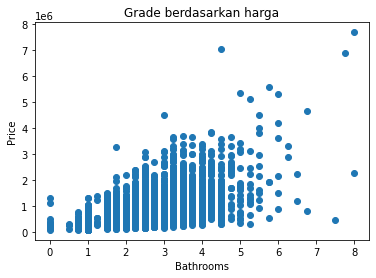

In [ ]:
plt.scatter(data['bathrooms'], data['price'])
plt.title('Grade berdasarkan harga')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()

In [ ]:
# Mengetahui nilai korelasi dari independent variable dan dependent variable
data1.corr().style.background_gradient().set_precision(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,lat,sqft_living15,sqft_lot15
price,1.00,0.31,0.53,0.70,0.09,0.26,0.67,0.61,0.32,0.31,0.59,0.08
bedrooms,0.31,1.00,0.52,0.58,0.03,0.18,0.36,0.48,0.30,-0.01,0.39,0.03
bathrooms,0.53,0.52,1.00,0.75,0.09,0.50,0.66,0.69,0.28,0.02,0.57,0.09
sqft_living,0.70,0.58,0.75,1.00,0.17,0.35,0.76,0.88,0.44,0.05,0.76,0.18
sqft_lot,0.09,0.03,0.09,0.17,1.00,-0.01,0.11,0.18,0.02,-0.09,0.14,0.72
floors,0.26,0.18,0.50,0.35,-0.01,1.00,0.46,0.52,-0.25,0.05,0.28,-0.01
grade,0.67,0.36,0.66,0.76,0.11,0.46,1.00,0.76,0.17,0.11,0.71,0.12
sqft_above,0.61,0.48,0.69,0.88,0.18,0.52,0.76,1.00,-0.05,-0.00,0.73,0.19
sqft_basement,0.32,0.30,0.28,0.44,0.02,-0.25,0.17,-0.05,1.00,0.11,0.20,0.02
lat,0.31,-0.01,0.02,0.05,-0.09,0.05,0.11,-0.00,0.11,1.00,0.05,-0.09


**X dan y**

In [ ]:
predictor = ['bathrooms'] #X
out = ['price'] #(Yi)

#Rumus LR Yi=bo+b1X
model = LinearRegression()
model.fit(data[predictor], data[out])

print(f'Intercept: {model.intercept_:}') #Nilai untuk b0 atau c
print(f'Coefficient: {model.coef_[0]:}') #Nilai untuk b1 atau m

fitted = model.predict(data[predictor]) #(Yi hat=Ypred)
residuals = data[out] - fitted #e=Yi-Yhat


Intercept: [10708.30853037]
Coefficient: [250326.5163021]


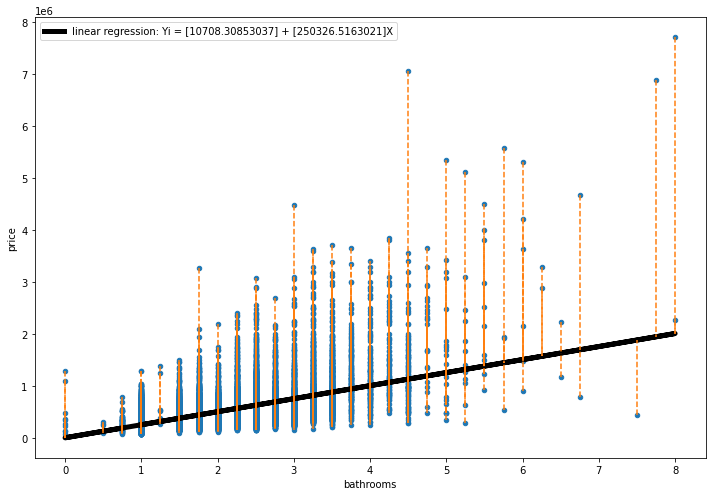

In [ ]:
ax = data.plot.scatter(x='bathrooms', y='price', figsize=(10, 7))
ax.plot(data.bathrooms, fitted, linewidth=5, color='k', label=f'linear regression: Yi = {model.intercept_:} + {model.coef_[0]}X')
for x, yactual, yfitted in zip(data.bathrooms, data.price, fitted): 
    ax.plot((x, x), (yactual, yfitted), '--', color='C1')
plt.tight_layout()
plt.legend()   #fungsi plt.legend () melacak gaya dan warna garis, dan mencocokkannya dengan label yang benar.
plt.show()

Variabel dependen adalah apa yang diukur dalam percobaan. Ini adalah perubahan karena adanya perubahan pada variabel independen.

In [ ]:
X=data1.iloc[:,1:] 
y=data1['price']

In [ ]:
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)

In [ ]:
# cek shape dari data training dan test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15129, 11)
(6484, 11)
(15129,)
(6484,)


In [ ]:
print("Banyak data latih setelah dilakukan Train-Validation Split: ", len(X_train))
print("Banyak data uji setelah dilakukan Train-Validation Split: ", len(X_test))

Banyak data latih setelah dilakukan Train-Validation Split:  15129
Banyak data uji setelah dilakukan Train-Validation Split:  6484


In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

In [ ]:
rumah = X.iloc[2000]
rumah


bedrooms            2.0000
bathrooms           1.0000
sqft_living      1010.0000
sqft_lot         3400.0000
floors              1.0000
grade               7.0000
sqft_above       1010.0000
sqft_basement       0.0000
lat                47.6711
sqft_living15    1800.0000
sqft_lot15       3600.0000
Name: 2000, dtype: float64

In [ ]:
pred_rumah = linreg.predict(rumah.values.reshape(1, -1))
print("predicted value:", pred_rumah[0])

predicted value: 401191.0407320261


In [ ]:
print("actual value:", y[2000])

actual value: 470450.0


In [ ]:
y_pred = linreg.predict(X)
y_pred[:10]

array([ 280919.80158216,  691042.0681711 ,  325162.19144132,
        421926.19848346,  541951.90133908, 1638781.6937063 ,
        245434.96127557,  190953.48798901,  442879.75990347,
        320867.42378603])

In [ ]:
harga = pd.DataFrame({"actual": y,
          "predicted": y_pred})
harga.head()

,actual,predicted
0,221900.0,280919.801582
1,538000.0,691042.068171
2,180000.0,325162.191441
3,604000.0,421926.198483
4,510000.0,541951.901339


In [ ]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.6080403147312722

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y, y_pred)

144247.80425248318

# **Regresi Logistik**

Algoritme machine learning yang diawasi dalam Python yang digunakan dalam memperkirakan nilai diskrit dalam biner, misalnya: 0/1, ya/tidak, benar/salah. Hal ini didasarkan pada satu set variabel independen. Algoritma ini digunakan untuk memprediksi kemungkinan terjadinya suatu peristiwa dengan memasukkan data tersebut ke dalam kurva logistik atau fungsi logistik. Inilah sebabnya mengapa disebut juga regresi logistik. Regresi logistik, juga disebut sebagai fungsi Sigmoid, mengambil angka yang bernilai nyata dan kemudian memetakannya ke nilai yang berada di antara 0 dan 1. Algoritma ini menemukan kegunaannya dalam menemukan email spam, prediksi klik situs web atau iklan, dan churn pelanggan. 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # metrics untuk accuracy
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification 
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [ ]:
url1 = 'https://raw.githubusercontent.com/aayushs879/Kaggle-Bank-Marketing-Dataset/master/bank.csv'
df = pd.read_csv(url1)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
list(df.keys())

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'deposit']

In [ ]:
X1 = np.asarray(df[['age', 'balance', 'duration']])
y1 = np.asarray(df['deposit'])

In [ ]:
print(X1[:10])

[[  59 2343 1042]
 [  56   45 1467]
 [  41 1270 1389]
 [  55 2476  579]
 [  54  184  673]
 [  42    0  562]
 [  56  830 1201]
 [  60  545 1030]
 [  37    1  608]
 [  28 5090 1297]]


In [ ]:
le = preprocessing.LabelEncoder()
le.fit(['yes', 'no'])
y1= le.transform(y1)
print(y1[:10])

[1 1 1 1 1 1 1 1 1 1]


In [ ]:
logreg = LogisticRegression()
logreg.fit(X1,y1)

LogisticRegression()

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size = 0.6)

In [ ]:
print("Banyak data latih setelah dilakukan Train-Validation Split: ", len(X1_train))
print("Banyak data uji setelah dilakukan Train-Validation Split: ", len(X1_test))

Banyak data latih setelah dilakukan Train-Validation Split:  6697
Banyak data uji setelah dilakukan Train-Validation Split:  4465


In [ ]:
# Training a logistic regression model

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X1_train, y1_train)
Y1_pred = logreg.predict(X1_test)

In [ ]:
# Applying confusion matrix on above data
cm = confusion_matrix(y1_test, Y1_pred)


Confusion matrix untuk Logistic Regression
 [[2012  369]
 [ 890 1194]]


Text(0.5, 1.0, 'Confusion Matriks dari Logistic Regression')

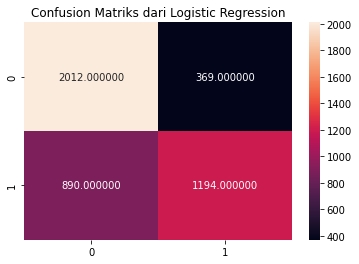

In [ ]:
print('Confusion matrix untuk Logistic Regression\n',cm)
sns.heatmap(cm, annot=True,fmt="f" ).set_title('Confusion Matriks dari Logistic Regression')

In [ ]:
# Presisi
precision_score(y1_test,Y1_pred)

0.763915547024952

In [ ]:
# Recall
recall_score(y1_test,Y1_pred)

0.572936660268714

In [ ]:
# F1
from sklearn.metrics import f1_score
f1_score(y1_test,Y1_pred)

0.6547847545928159

In [ ]:
# ROC
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y1_test, Y1_pred, pos_label=1)
metrics.auc(fpr, tpr)

0.7089798799033616

In [ ]:
# Logarithmic Loss
from sklearn.metrics import log_loss
log_loss(y1_test,Y1_pred)

9.738995416045753